# Introduction

In this notebook, we're going to deal with a supervised classification problem using Titanic passenger data. One of the most devastating maritime disasters in the world – and thanks to James Cameron, the most famous – provided us with data we're going to use to predict passengers' survival. We'll divide the work into three main stages: 
- Data Wrangling and Exploratory Data Analysis
- Feature Engineering and Encoding
- Model

In [1]:
import pandas as pd
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print('Number of training examples: {}'.format(train.shape[0]))
print('Number of test examples: {}\n'.format(test.shape[0]))

print('Number of training features: {}'.format(train.shape[1]))
print('Number of test features: {}\n'.format(test.shape[1]))

print(train.columns)
print(test.columns)

Number of training examples: 891
Number of test examples: 418

Number of training features: 12
Number of test features: 11

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


# Exploratory Data Analysis
## Features overview

Let's start with a brief look at the features overview below. Next, we'll see how much data is missing, and then we'll look over basic metrics like value count, mean, standard deviation, etc.


| Variable | Definition | Notes |
| :- | :- | :- |
| PassengerId | Unique ID for every passenger in dataset | |
| Survived | Survival | 0 = No, 1 = Yes | 
| Pclass | A proxy for socio-economic status (SES) | 1 = 1st, 2 = 2nd, 3 = 3rd |
| Name | (self-explanatory) | |
| Sex | (self-explanatory) | |
| Age | Age in years | Age is fractional if less than 1. If the age is estimated, it's in the form of xx.5 |
| SibSp | # of siblings / spouses aboard the Titanic | Sibling = brother, sister, stepbrother, stepsister<br>Spouse = husband, wife (mistresses and fiancés were ignored) |
| Parch | # of parents / children aboard the Titanic | Parent = mother, father<br>Child = daughter, son, stepdaughter, stepson<br>Some children travelled only with a nanny, therefore parch=0 for them. |
| Ticket | Ticket number | |
| Fare | Passenger fare | |
| Cabin | Cabin number | |
| Embarked | Port of embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

In [2]:
train.info()
train.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [3]:
test.info()
test.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Missing values

Before we get to the actual analysis, we need to deal with missing values. Let's count them and then decide whether we're going to fill these gaps or get rid of the entire feature.

In [5]:
print('Missing values in train set')
print(train.isnull().sum())

print('\nMissing values in test set')
print(test.isnull().sum())

Missing values in train set
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values in test set
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


We're missing a lot of age values and only 2 in _Embarked_, but that's nothing compared to _Cabin_, where we're missing 687 out of 891 values in the entire dataset. Unfortunately, we won't use this feature in any meaningful way, and we'll get rid of it at a later stage.

Normally, at this point, we'd start building the pipeline so we could apply the same process to all new data we plan to feed into the model. Since we don't plan on sinking the Titanic again anytime soon, we'll let it go this time and move on.

For the _Embarked_ feature, we'll use mode, which we know from the table created by the .describe() function. We already know 644 passengers set off from Southampton, so we can safely assume that these two missing ones did too.

In [6]:
train['Embarked'].fillna('S', inplace=True)
print('Number of missing values in Embarked: {}'.format(train['Embarked'].isna().sum()))

Number of missing values in Embarked: 0


_Fare_ is missing one value in the test dataset. Let's group the data by the _Pclass_, see whether he traveled with his family, and then fill in the missing piece with the median from this group.

In [7]:
print(test[test['Fare'].isna()])
print(test[['Pclass', 'Fare']].groupby('Pclass', as_index=False).median())

test['Fare'].fillna(7.90, inplace=True)
print('\nNumber of missing values in Fare: {}'.format(test['Fare'].isna().sum()))

     PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Cabin Embarked  
152   NaN   NaN        S  
   Pclass     Fare
0       1  60.0000
1       2  15.7500
2       3   7.8958

Number of missing values in Fare: 0


Now we face the biggest challenge. We need to fill in a lot of missing values in the _Age_ feature. To not fill all the gaps with only one, fixed value, we'll examine the median age in relation to _Pclass_ and _Sex_. After that, we'll segment the data and fill it with appropriate values. To preserve the convention, we'll add .5 to the estimated values.

In [8]:
print(train[['Pclass', 'Sex', 'Age']].groupby(['Pclass', 'Sex'], as_index=False).median())

age_1f = train.loc[(train['Pclass'] == 1) & (train['Sex'] == 'female')][['Age']]
age_1m = train.loc[(train['Pclass'] == 1) & (train['Sex'] == 'male')][['Age']]
age_2f = train.loc[(train['Pclass'] == 2) & (train['Sex'] == 'female')][['Age']]
age_2m = train.loc[(train['Pclass'] == 2) & (train['Sex'] == 'male')][['Age']]
age_3f = train.loc[(train['Pclass'] == 3) & (train['Sex'] == 'female')][['Age']]
age_3m = train.loc[(train['Pclass'] == 3) & (train['Sex'] == 'male')][['Age']]

age_1f.fillna(35.5, inplace=True)
age_1m.fillna(40.5, inplace=True)
age_2f.fillna(28.5, inplace=True)
age_2m.fillna(30.5, inplace=True)
age_3f.fillna(21.5, inplace=True)
age_3m.fillna(25.5, inplace=True)

age_filled = pd.concat([age_1f, age_1m, age_2f, age_2m, age_3f, age_3m])

train['Age'] = age_filled

print('\nNumber of missing values in Age: {}'.format(train['Age'].isna().sum()))

   Pclass     Sex   Age
0       1  female  35.0
1       1    male  40.0
2       2  female  28.0
3       2    male  30.0
4       3  female  21.5
5       3    male  25.0

Number of missing values in Age: 0


In [9]:
print(test[['Pclass', 'Sex', 'Age']].groupby(['Pclass', 'Sex'], as_index=False).median())

age_1f = test.loc[(test['Pclass']==1) & (test['Sex']=='female')][['Age']]
age_1m = test.loc[(test['Pclass']==1) & (test['Sex']=='male')][['Age']]
age_2f = test.loc[(test['Pclass']==2) & (test['Sex']=='female')][['Age']]
age_2m = test.loc[(test['Pclass']==2) & (test['Sex']=='male')][['Age']]
age_3f = test.loc[(test['Pclass']==3) & (test['Sex']=='female')][['Age']]
age_3m = test.loc[(test['Pclass']==3) & (test['Sex']=='male')][['Age']]

age_1f.fillna(41.5, inplace=True)
age_1m.fillna(42.5, inplace=True)
age_2f.fillna(24.5, inplace=True)
age_2m.fillna(28.5, inplace=True)
age_3f.fillna(22.5, inplace=True)
age_3m.fillna(24.5, inplace=True)

age_filled = pd.concat([age_1f, age_1m, age_2f, age_2m, age_3f, age_3m])

test['Age'] = age_filled

print('\nNumber of missing values in Age: {}'.format(test['Age'].isna().sum()))

   Pclass     Sex   Age
0       1  female  41.0
1       1    male  42.0
2       2  female  24.0
3       2    male  28.0
4       3  female  22.0
5       3    male  24.0

Number of missing values in Age: 0


## Data visualisation

Coolio. We've filled in all the missing values (except _Cabin_, but we'll get rid of it later) and we're ready to move to the general data visualization. Let us start by plotting the distribution of the target in continuous and categorical features, and then we'll evaluate the feature vs target and feature vs feature correlations. This way we'll gain a general overview of the data, which will allow us to pick features for the final model.

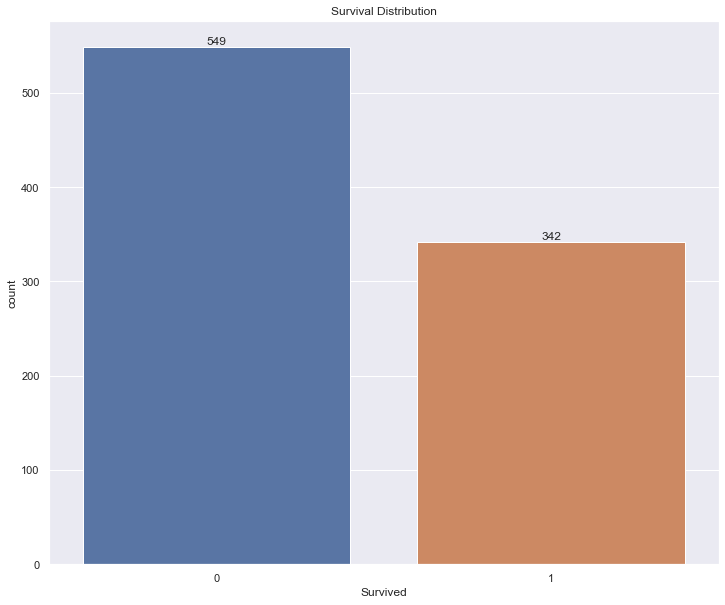

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.set(style="darkgrid")

ax = sns.countplot(data=train, x='Survived')
ax.bar_label(ax.containers[0])
ax.set_title('Survival Distribution')

plt.show()

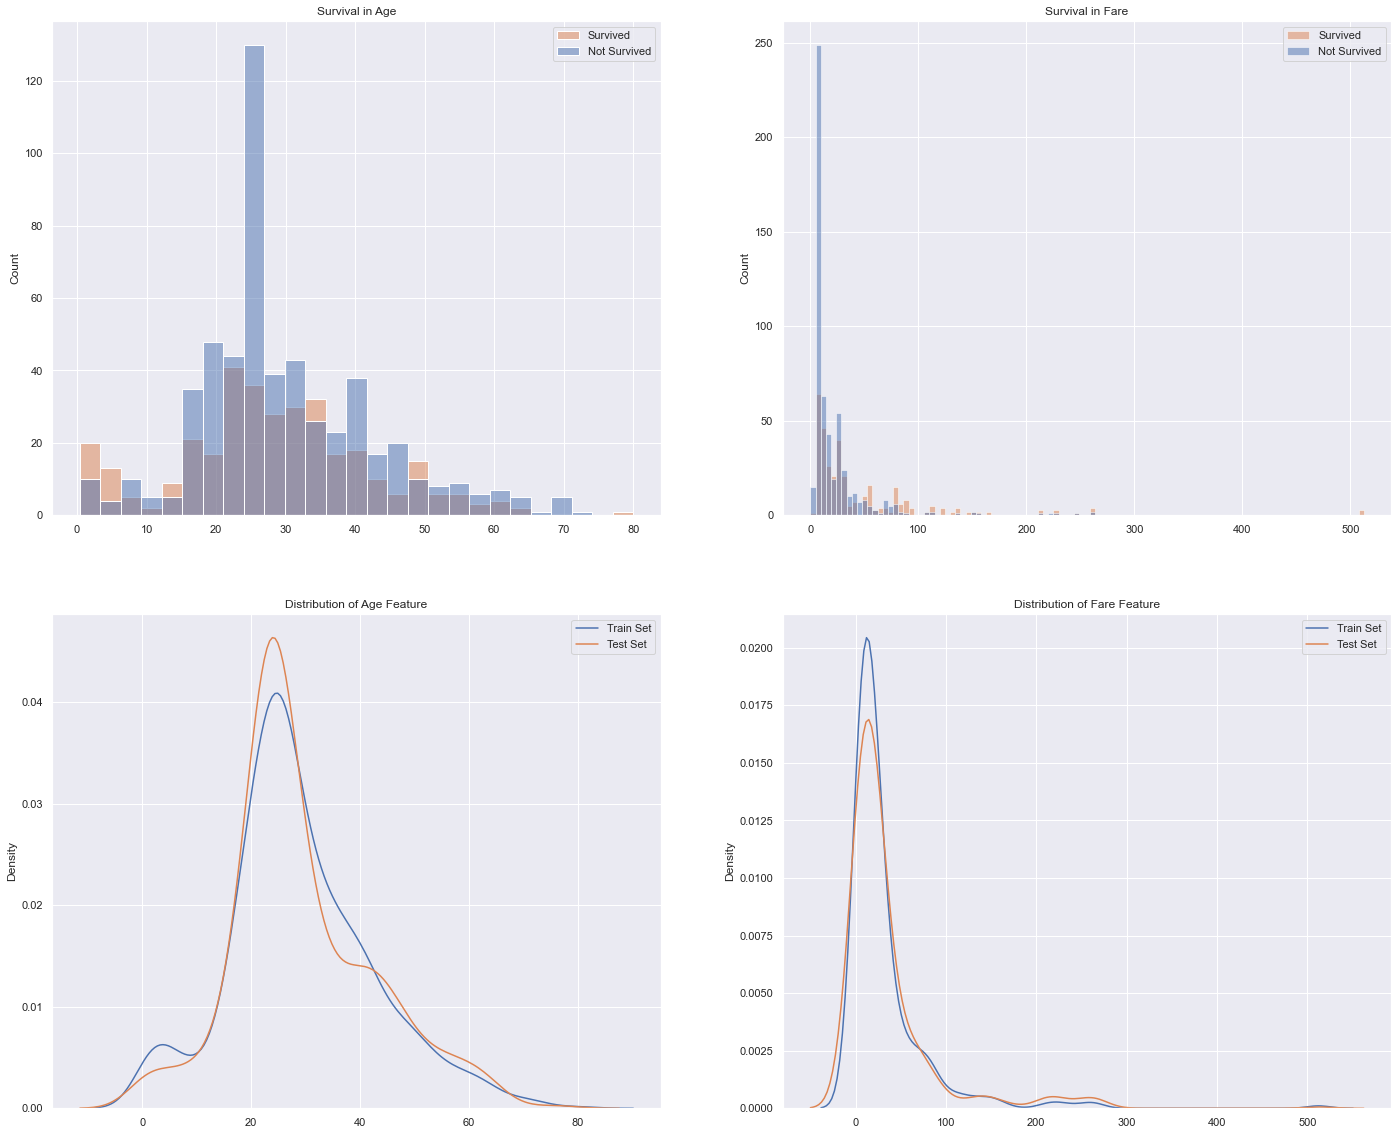

In [11]:
cont_features = ['Age', 'Fare']

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(24, 20))

for i in range(2):
    feature = cont_features[i]
    sns.histplot(x=feature, hue='Survived', data=train, ax=axs[0, i])
    axs[0][i].legend(['Survived', 'Not Survived'], loc='upper right')
    axs[0][i].set_title('Survival in {}'.format(feature))
    axs[0][i].set_xlabel('')

for i in range(2):
    feature = cont_features[i]
    sns.distplot(train[feature], label='Train Set', hist=False, ax=axs[1, i])
    sns.distplot(test[feature], label='Test Set', hist=False, ax=axs[1, i])
    axs[1][i].legend(loc='upper right')
    axs[1][i].set_title('Distribution of {} Feature'.format(feature))
    axs[1][i].set_xlabel('')
        
plt.show()

The distribution of features in both datasets (train and test) is similar. Not surprisingly, children had the best chance of survival of all age groups. _Fare_ has an extremely right-skewed distribution, because of a few heavy outliers on the "rich" end of the axis. 

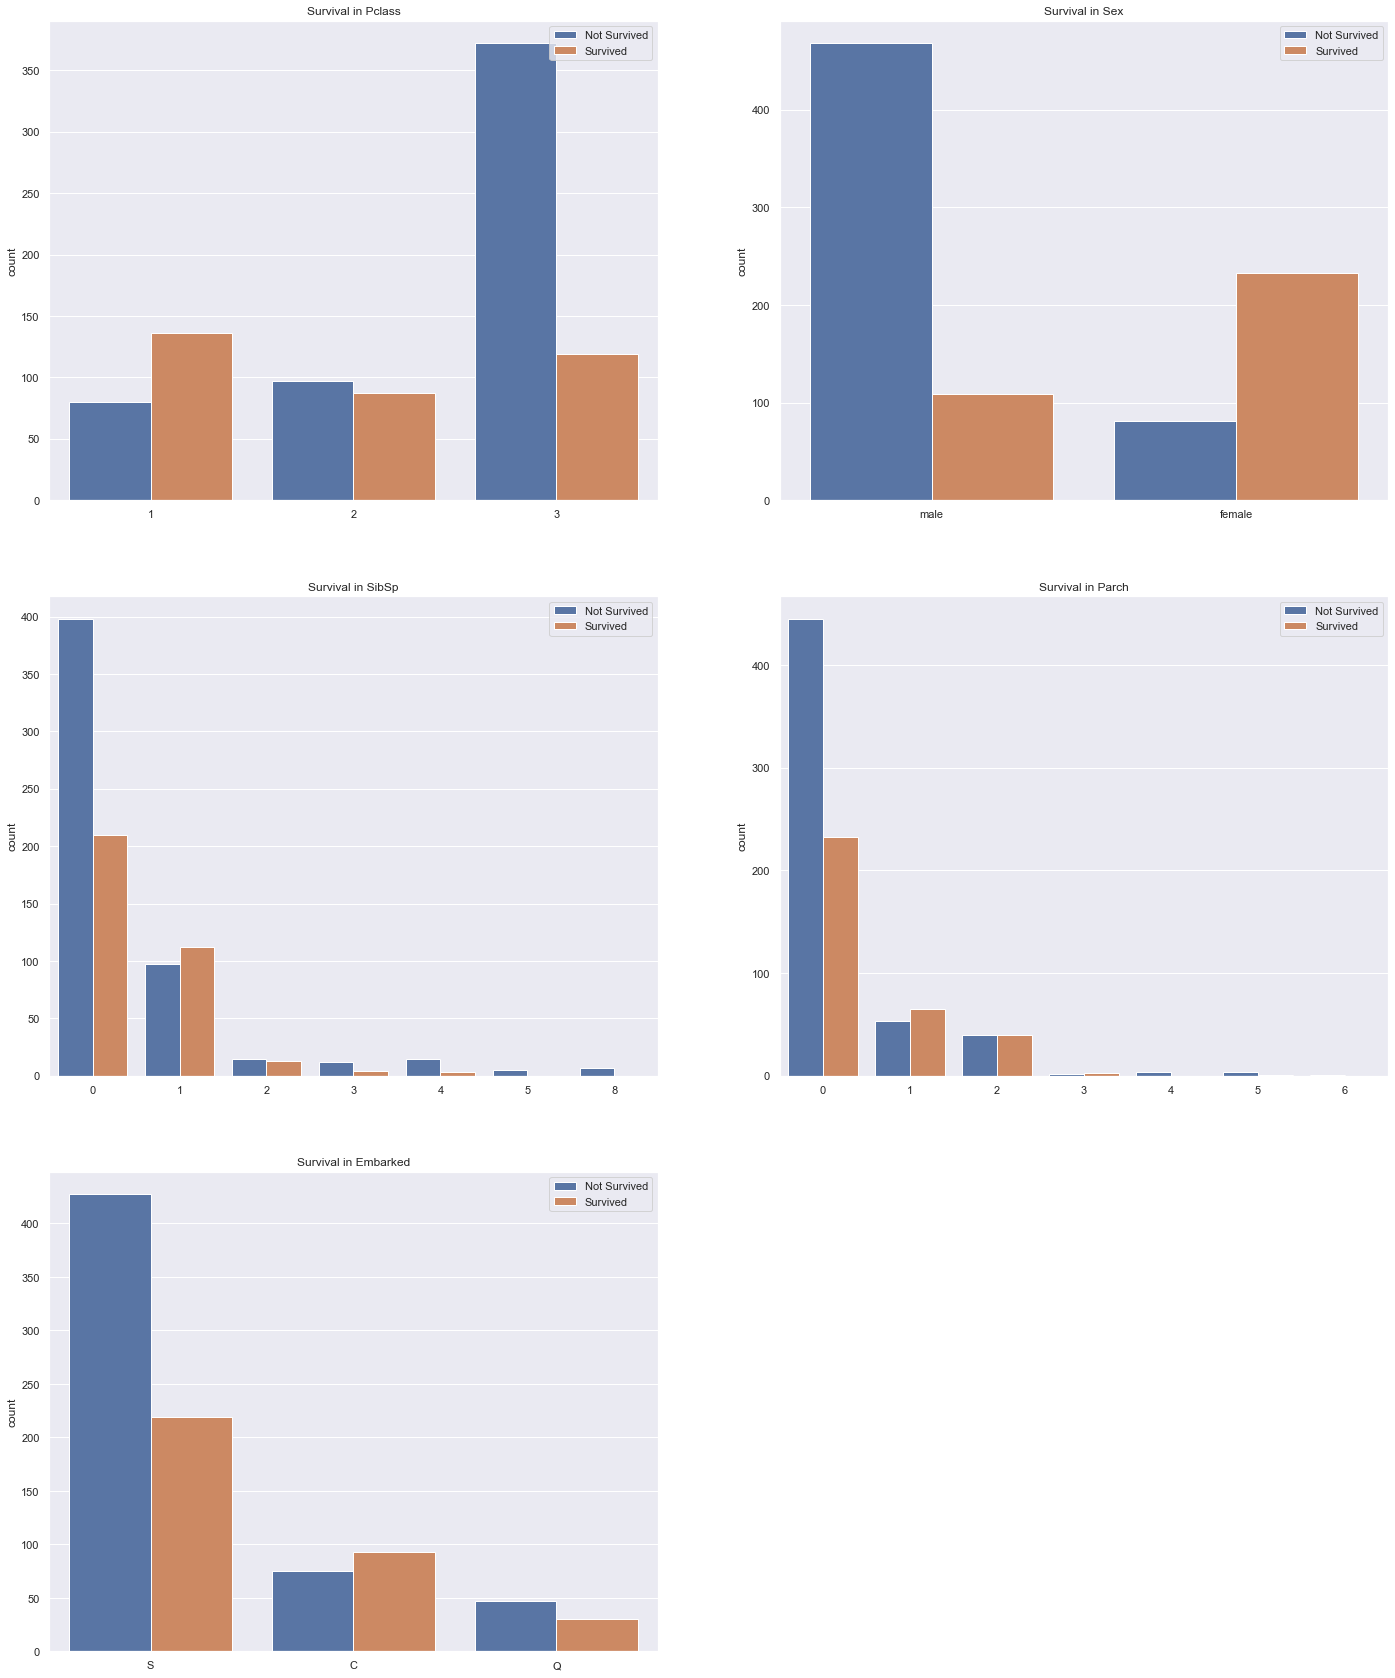

In [12]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(24, 30))

cat_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for i in range(3):
    for j in range(2):
        feature = cat_features.pop(0)
        sns.countplot(x=feature, hue='Survived', data=train, ax=axs[i, j])
        axs[i][j].legend(['Not Survived', 'Survived'], loc='upper right')
        axs[i][j].set_title('Survival in {}'.format(feature))
        axs[i][j].set_xlabel('')
        
        if len(cat_features) == 0:
            break
            
axs[2][1].remove()      
plt.show()

Here we see several features that will help us determine whether the passenger survived the sinkage. The lower the _Pclass_, the lower the chance of surviving. Women had priority for evacuation (lifeboats had seats for only half the passengers). It seems that a small family (1-2 _SibSp/Parch_) was a great advantage in the rescue, single passengers and people with large families had much less chance of survival. Those embarked from Cherbourg had a better chance of being rescued than those from Southampton and Queenstown.

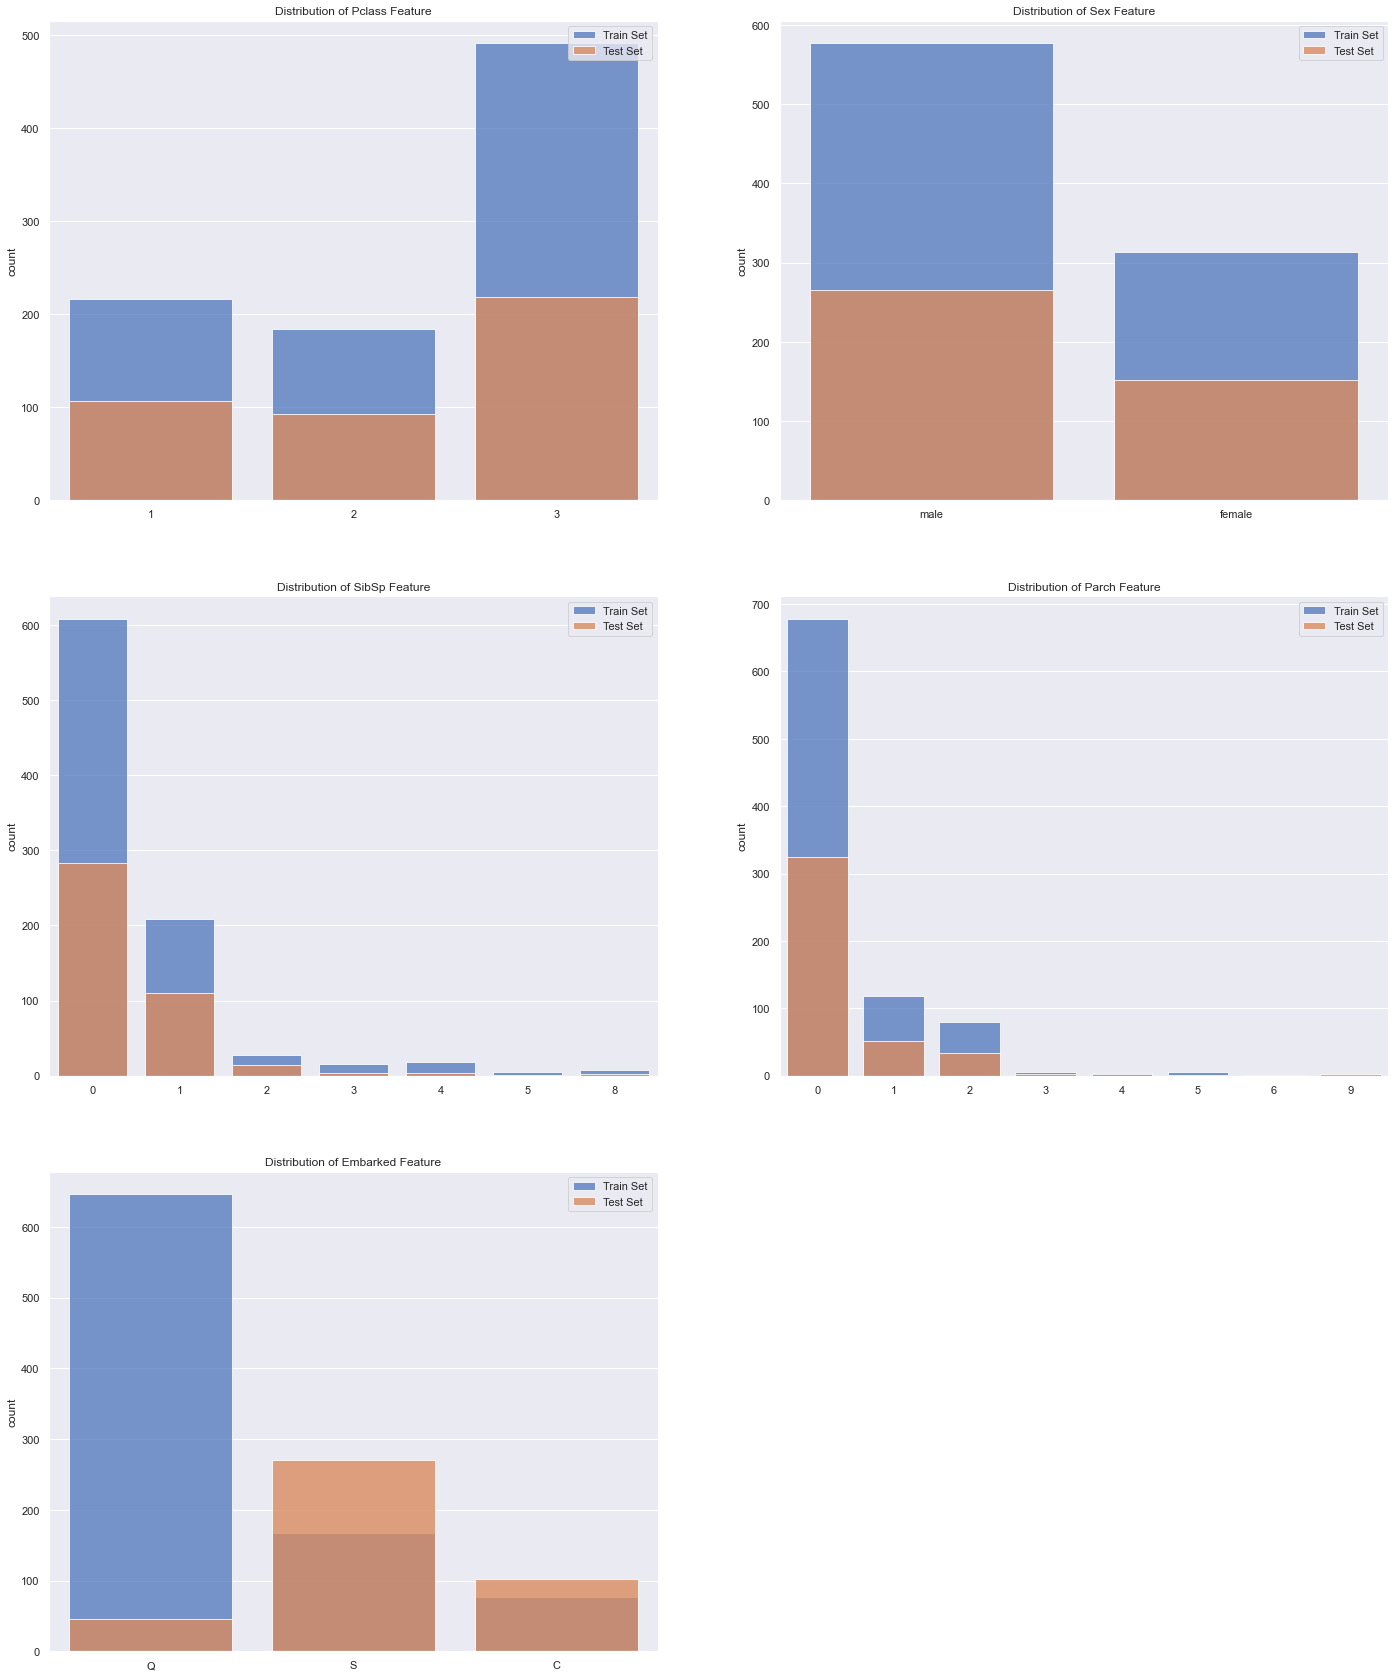

In [13]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(24, 30))

cat_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for i in range(3):
    for j in range(2):
        feature = cat_features.pop(0)
        sns.countplot(x=feature, data=train, label='Train Set', color='#4878d0', alpha=.8, ax=axs[i, j])
        sns.countplot(x=feature, data=test, label='Test Set', color='#ee854a', alpha=.8, ax=axs[i, j])
        axs[i][j].legend(loc='upper right')
        axs[i][j].set_title('Distribution of {} Feature'.format(feature))
        axs[i][j].set_xlabel('')
        
        if len(cat_features) == 0:
            break
            
axs[2][1].remove()
plt.show()

As with continuous features, we compared the distribution of categorical features in the train and test datasets. In the case of Embarked, we see a strong imbalance. In the test set we have more passengers from Southampton and Cherbourg, and passengers from Queenstown (who lead the train set) are in the minority here. Considering the survival rate of Cherbourg passengers, we'll have to take this into account at the feature engineering stage.

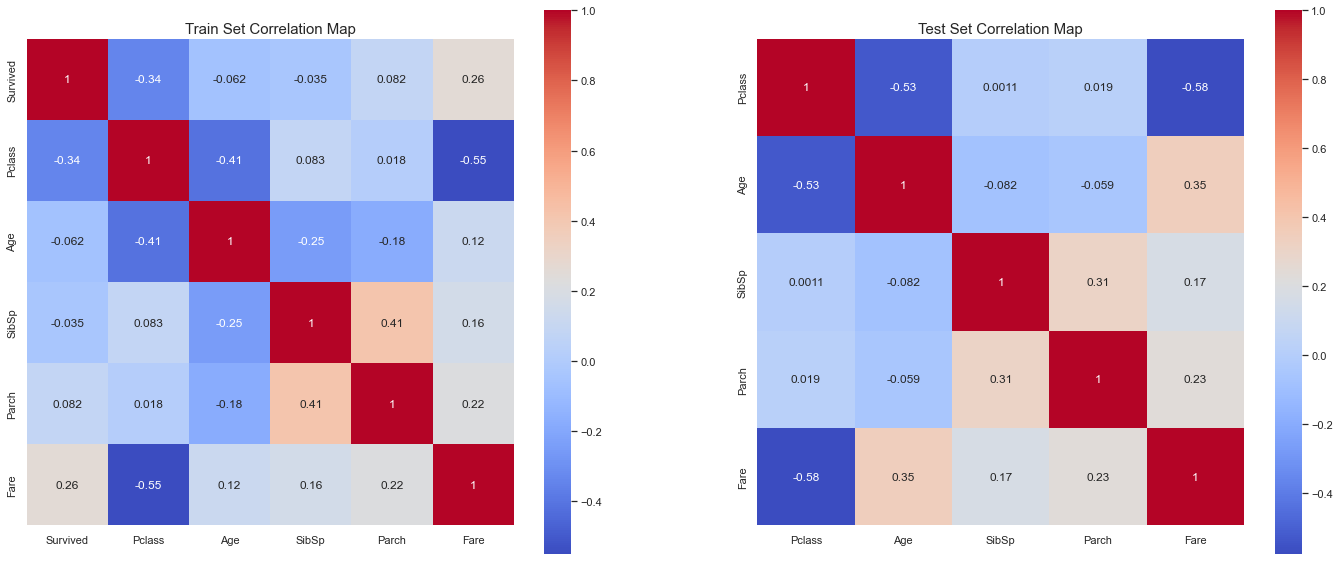

In [14]:
fig, axs = plt.subplots(ncols=2, figsize=(24, 10))

sns.heatmap(train.drop(['PassengerId'], axis=1).corr(), ax=axs[0], annot=True, square=True, cmap='coolwarm')
axs[0].set_title('Train Set Correlation Map', size=15)

sns.heatmap(test.drop(['PassengerId'], axis=1).corr(), ax=axs[1], annot=True, square=True, cmap='coolwarm')
axs[1].set_title('Test Set Correlation Map', size=15)

plt.show()

A good deal of features are correlated with each other, we'll make use of these dependencies later when creating new ones. We can see a strong correlation between _Survived_ and _Pclass_, _Sex_, and partially in _SibSp_, _Parch_, and _Embarked_ features. Other noticable correlations include _Fare_ and _Pclass_, _Age_ and _Pclass_, _SibSp_ and _Parch_, _SibSp_ and _Age_.

Let's write a simple function, which prints the survival rate of individual values in chosen feature.

In [15]:
def impact_on_survival(feature):
    '''Takes a categorical feature, prints the correlation between its values and the "Survived" feature'''
    print('Impact of {} on Survival'.format(feature))
    print(train[[feature, 'Survived']].groupby(feature, as_index=False).mean())
    print('\n')

for feature in ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']:
    impact_on_survival(feature)

Impact of Pclass on Survival
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


Impact of Sex on Survival
      Sex  Survived
0  female  0.742038
1    male  0.188908


Impact of SibSp on Survival
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


Impact of Parch on Survival
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000


Impact of Embarked on Survival
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009




# Feature Engineering

Ok, we already know a bit about our data. At this stage, we'll utilize this knowledge to:
- convert continuous features into categorical ones,
- create new features and examine their correlations,
- prepare datasets for processing by the algorithms.


## Binning Continuous Features

Let us start by dividing the _Fare_ and _Age_ features into buckets using the classic formula for the number of classes:
<br>$k=\sqrt{N}$<br><br>
where:<br>
k – number of classes<br>
N – number of unique values<br><br>
Since the distributions in both datasets are not identical, we must determine the class intervals on the combined data. Then (separately for each dataset) we'll replace the current values with the corresponding classes.

In [16]:
import numpy as np

for feature in cont_features:
    print('Number of bins in {} is {}'.format(feature, np.sqrt(len(train[feature].value_counts()))))

Number of bins in Age is 9.539392014169456
Number of bins in Fare is 15.748015748023622


Impact of Age on Survival
            Age  Survived
0  (0.17, 16.0]  0.550000
1  (16.0, 21.0]  0.307692
2  (21.0, 22.5]  0.521739
3  (22.5, 24.6]  0.425532
4  (24.6, 26.0]  0.155556
5  (26.0, 30.0]  0.413043
6  (30.0, 34.0]  0.410256
7  (34.0, 40.0]  0.505263
8  (40.0, 48.0]  0.318681
9  (48.0, 80.0]  0.387500


Impact of Fare on Survival
                  Fare  Survived
0         (0.0, 7.229]  0.163636
1        (7.229, 7.75]  0.271429
2        (7.75, 7.796]  0.260870
3       (7.796, 7.896]  0.150000
4        (7.896, 8.05]  0.225806
5        (8.05, 9.844]  0.180000
6        (9.844, 13.0]  0.419355
7       (13.0, 14.454]  0.315789
8      (14.454, 17.95]  0.403846
9       (17.95, 24.15]  0.465517
10      (24.15, 26.55]  0.523077
11     (26.55, 31.275]  0.351852
12      (31.275, 47.1]  0.352941
13       (47.1, 69.55]  0.593220
14    (69.55, 106.425]  0.703704
15  (106.425, 512.329]  0.745098




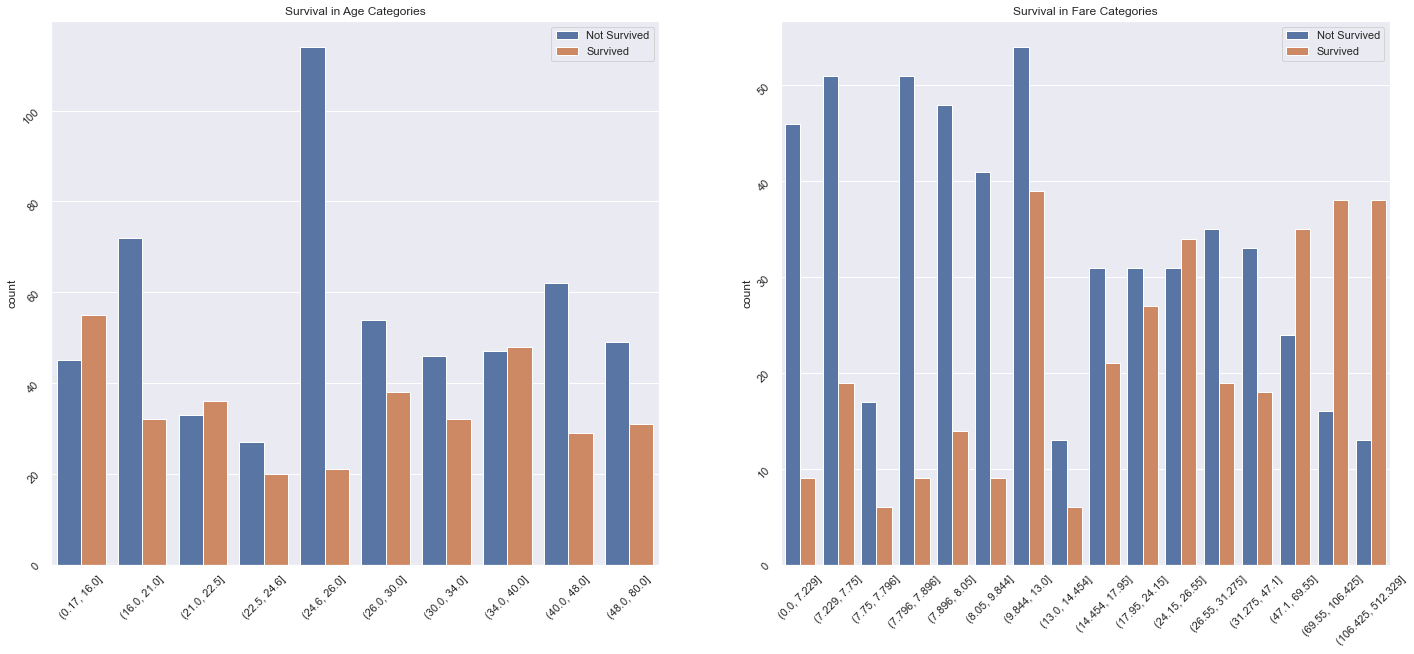

In [17]:
fig, axs = plt.subplots(ncols=2, figsize=(24, 10))

age_cats, age_bins = pd.qcut(pd.concat([train['Age'], test['Age']]), 10, retbins=True)
fare_cats, fare_bins = pd.qcut(pd.concat([train['Fare'], test['Fare']]), 16, retbins=True)

train['Age'] = pd.cut(train['Age'], age_bins)
test['Age'] = pd.cut(test['Age'], age_bins)

train['Fare'] = pd.cut(train['Fare'], fare_bins)
test['Fare'] = pd.cut(test['Fare'], fare_bins)

for i in range(2):
    sns.countplot(x=cont_features[i], hue='Survived', data=train, ax=axs[i])
    axs[i].set_title('Survival in {} Categories'.format(cont_features[i]))
    axs[i].legend(['Not Survived', 'Survived'], loc='upper right')
    axs[i].tick_params(labelrotation=45)
    axs[i].set_xlabel('')

    impact_on_survival(cont_features[i])

plt.show()

## Family Size

Now we'll map the values of the _SibSp_ and _Parch_ features creating _FamSize_, the overall size of the passenger's family. After inspecting the survival rate in relation to the family size, we can see that small families (1-3) had the most odds, followed by single travelers, and the least for medium and large families (4-10). Let us use these insights to bin _FamSize_.

Impact of FamSize on Survival
   FamSize  Survived
0        0  0.303538
1        1  0.552795
2        2  0.578431
3        3  0.724138
4        4  0.200000
5        5  0.136364
6        6  0.333333
7        7  0.000000
8       10  0.000000


Impact of FamSize_gr on Survival
  FamSize_gr  Survived
0      Alone  0.303538
1      Large  0.000000
2     Medium  0.204082
3      Small  0.578767




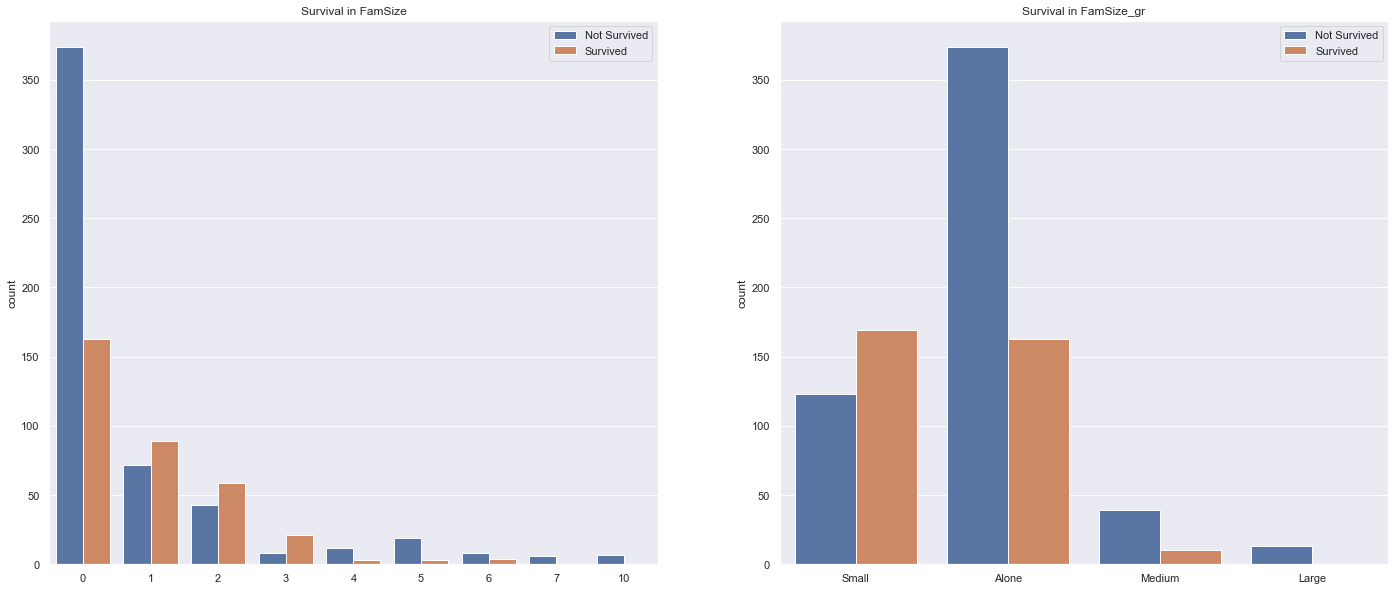

In [18]:
train['FamSize'] = train['SibSp'] + train['Parch']
test['FamSize'] = test['SibSp'] + test['Parch']

famsize_map = {0: 'Alone', 1:'Small', 2:'Small', 3:'Small', 4:'Medium', 5:'Medium', 6:'Medium', 7:'Large', 10:'Large'}

train['FamSize_gr'] = train['FamSize'].map(famsize_map)
test['FamSize_gr'] = test['FamSize'].map(famsize_map)

fig, axs = plt.subplots(ncols=2, figsize=(24, 10))
fam_features = ['FamSize', 'FamSize_gr']

for i in range(2):
    sns.countplot(x=fam_features[i], hue='Survived', data=train, ax=axs[i])
    axs[i].set_title('Survival in {}'.format(fam_features[i]))
    axs[i].legend(['Not Survived', 'Survived'], loc='upper right')
    axs[i].set_xlabel('')

    impact_on_survival(fam_features[i])

plt.show()

## Titles

The _Name_ feature provides us with a very interesting piece of information. The prefix of each passenger's name informs us about their title, i.e. about their social role. Each _Name_ value is formed using the consistent format "Surname, Title. First-Name Middle-Name". This observation allows us to easily create and analyze another feature – _Title_

Impact of Title on Survival
           Title  Survived
0           Capt  0.000000
1            Col  0.500000
2            Don  0.000000
3             Dr  0.428571
4       Jonkheer  0.000000
5           Lady  1.000000
6          Major  0.500000
7         Master  0.575000
8           Miss  0.697802
9           Mlle  1.000000
10           Mme  1.000000
11            Mr  0.156673
12           Mrs  0.792000
13            Ms  1.000000
14           Rev  0.000000
15           Sir  1.000000
16  the Countess  1.000000




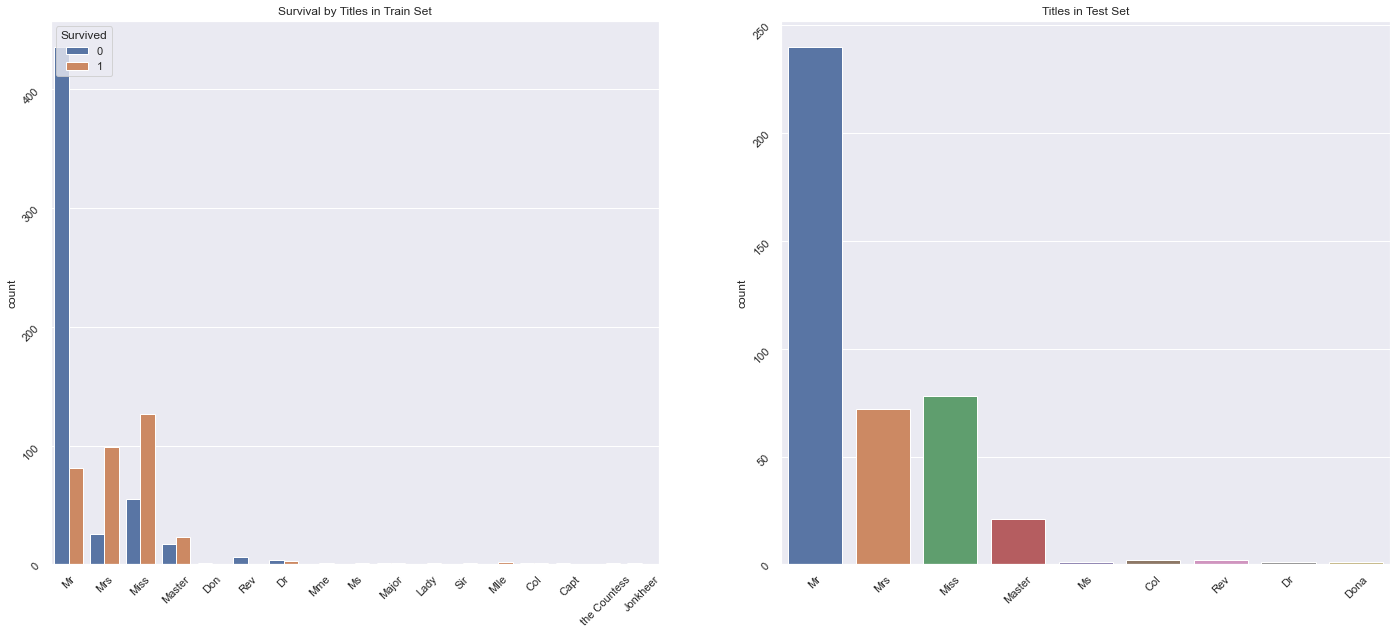

In [19]:
train['Title'] = train['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
test['Title'] = test['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

fig, axs = plt.subplots(ncols=2, figsize=(24, 10))

sns.countplot(x='Title', hue='Survived', data=train, ax=axs[0])
axs[0].set_title('Survival by Titles in Train Set')
axs[0].set_xlabel('')
axs[0].tick_params(labelrotation=45)

sns.countplot(x='Title', data=test, ax=axs[1])
axs[1].set_title('Titles in Test Set')
axs[1].set_xlabel('')
axs[1].tick_params(labelrotation=45)
    
impact_on_survival('Title')

plt.show()

A full cross-section of society was present on Titanic: many nationalities, different social classes, genders, and ages – it's all clear when we look at the impressive list of titles. Let's group them now to capture all the nuances.

The highest survival rate has the title of a married woman (Mrs, Mme), hence it deserves its own group. Unmarried female titles will be merged into a collective "Miss" (Miss, Mlle, Ms). Young aristocrats (Master) also had a high survival rate (at least much higher than the other men), hence we'll leave this title as a separate group. The remaining titles (except the most common "Mr") will be grouped into the category of rare titles.

In [20]:
for dataset in [train, test]:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'the Countess','Capt', 'Col', 'Don', 'Dr', \
                                                 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

impact_on_survival('Title')

Impact of Title on Survival
    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826




## Feature Encoding

Before we get into training models, let's tackle the last task on our list. In this final step, we'll encode the categorical features for the algorithms to understand them. Our data contains both ordinal and non-ordinal categorical features, and we need to treat them differently. 

In the case of ordinal features, we'll use label encoding, replacing the descriptive scale with a numerical one. For non-ordinal features, we'll use one-hot encoding, creating a two-dimensional, binary matrix in which feature values will turn into columns, where affiliation will be determined by a dummy value (0=False, 1=True).

In [21]:
from sklearn.preprocessing import LabelEncoder

ordinal_features = ['Age', 'Fare']
non_ordinal_features = ['Sex', 'Embarked', 'FamSize_gr', 'Title']

for dataset in [train, test]:
    for feature in ordinal_features:
        dataset[feature] = LabelEncoder().fit_transform(dataset[feature])
          
train_dummies = pd.get_dummies(train[non_ordinal_features])
test_dummies = pd.get_dummies(test[non_ordinal_features])

train = pd.concat([train, train_dummies], axis=1)
test = pd.concat([test, test_dummies], axis=1)

print('Number of Columns in Train Set: {}'.format(len(train.columns)))
print('Number of Columns in Test Set: {}'.format(len(test.columns)))

Number of Columns in Train Set: 29
Number of Columns in Test Set: 28


In [22]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamSize', 'FamSize_gr',
       'Title', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'FamSize_gr_Alone', 'FamSize_gr_Large',
       'FamSize_gr_Medium', 'FamSize_gr_Small', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Rare'],
      dtype='object')


# Model

Finally, we can move on to training classifiers. Firstly, let us create the two datasets, named according to the convention: X and y. This is the point where we discard unnecessary features and leave only those necessary for prediction.

In [23]:
drop_columns = ['PassengerId', 'Name', 'Sex', 'SibSp',
       'Parch', 'Ticket', 'Cabin', 'Embarked', 'FamSize', 'FamSize_gr',
       'Title']

X = train.drop(columns=drop_columns)
X.drop('Survived', axis=1, inplace=True)
y = train['Survived']
X_pred = test.drop(columns=drop_columns)

Now let's divide our dataset into training and test data. From now on, we'll operate only on the train set, leaving the test set aside and using it only once, for the final evaluation of the trained classifier's performance. 

In the first step, let us train various models using the default parameters. To compare their effectiveness, we'll perform 10-fold cross-validation, and calculate the average accuracy and its standard deviation.

Standard Deviation of LogisticRegression: 0.038
Standard Deviation of LinearDiscriminant: 0.035
Standard Deviation of KNeighbors: 0.060
Standard Deviation of SVC: 0.048
Standard Deviation of GaussianProcess: 0.055
Standard Deviation of DecisionTree: 0.067
Standard Deviation of GaussianNB: 0.055


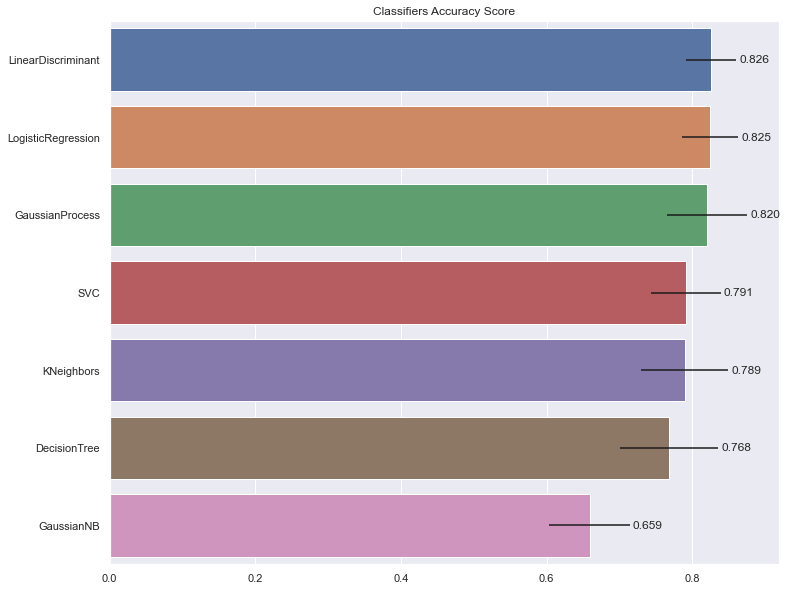

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

classifiers = [
    ('LogisticRegression', LogisticRegression(max_iter=200, random_state=42)),
    ('LinearDiscriminant', LinearDiscriminantAnalysis()),
    ('KNeighbors', KNeighborsClassifier()),
    ('SVC', SVC(probability=True, random_state=42)),
    ('GaussianProcess', GaussianProcessClassifier(random_state=42)),
    ('DecisionTree', DecisionTreeClassifier(random_state=42)),
    ('GaussianNB', GaussianNB()),
]

classifier = []
accuracy = []
std = []

for clf_name, clf in classifiers:    
    classifier.append(clf_name)
    cv_accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=10)
    accuracy.append(cv_accuracy.mean())
    std.append(cv_accuracy.std())
    print('Standard Deviation of {}: {:.3f}'.format(clf_name, cv_accuracy.std()))
        
clf_performance = pd.DataFrame({
    'classifier':classifier, 
    'accuracy':accuracy,
    'std':std
})

clf_performance.sort_values('accuracy', ascending=False, inplace=True)

plt.figure(figsize=(12, 10))
ax = sns.barplot(x='accuracy', y='classifier', xerr=clf_performance['std']*1, data=clf_performance)
ax.set_title('Classifiers Accuracy Score')
ax.bar_label(ax.containers[1], fmt='%.3f', padding=3)
ax.set_xlabel('')
ax.set_ylabel('')
plt.show()

As we see on the plot, the Linear Discriminant classifier achieved the highest accuracy, followed closely by Logistic Regression. These models not only have the highest accuracy but also the lowest standard deviation, i.e. they are the most stable. Before we go any further, I'd like to repeat this experiment using different measures: F1, precision, and recall.

Precision is a measure that answers the question of how many of our estimates turned out to be correct. In our case, the positive class is survival (Survived = 1) and the negative class is death (Survived = 0), so precision will tell us how many people we predicted as survivors actually survived the disaster.

Recall is a measure that answers the question of how many of the positive classes we were able to identify, in other words, a recall will tell us how many of the survivors we were able to identify.

F1 is the harmonic mean of precision and recall. It allows us to evaluate and compare classifiers without having to analyze these two measures simultaneously.

Why is accuracy not enough for us? Although it seems to be an ideal measure, it has a huge disadvantage. Accuracy is designated as correct predictions divided by all predictions, which means that if we worked on an imbalanced dataset with a proportion of 80:20, a model that would automatically assign all examples to a positive class would achieve as much as 80% accuracy. There is no perfect measure, so it's recommended to verify classifiers' performance using more than just one.

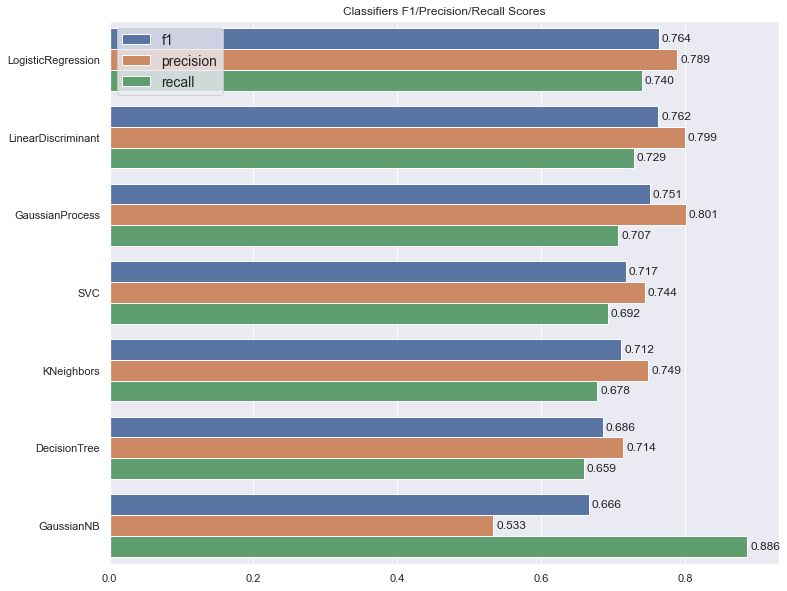

In [25]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, precision_score, recall_score

classifier = []
f1 = []
precision = []
recall = []

for clf_name, clf in classifiers:
    y_pred = cross_val_predict(clf, X_train, y_train, cv=10)
    
    classifier.append(clf_name)
    f1.append(f1_score(y_train, y_pred))
    precision.append(precision_score(y_train, y_pred))
    recall.append(recall_score(y_train, y_pred))
    
clf_performance = pd.DataFrame({
    'classifier':classifier, 
    'f1':f1, 
    'precision':precision, 
    'recall':recall
})
    
clf_performance_m = pd.melt(clf_performance, id_vars=['classifier'], value_vars=['f1', 'precision', 'recall'])

plt.figure(figsize=(12, 10))
ax = sns.barplot(x='value', y='classifier', hue='variable', data=clf_performance_m.sort_values(['variable', 'value'], ascending=[True, False]))
ax.set_title('Classifiers F1/Precision/Recall Scores')
for i in range(3):
    ax.bar_label(ax.containers[i], fmt='%.3f', padding=3)
ax.legend(loc='upper left', prop={'size': 14})
ax.set_xlabel('')
ax.set_ylabel('')
plt.show()

Now, this plot tells us much more. Logistic Regression and Linear Discriminant win again, both models yield a high F1 and balanced precision and recall, in addition, now we can see why Gaussian Naive Bayes had such low accuracy. Very high recall and low precision mean that the model classified many more people as survivors than it should – it certainly won't be our choice.

To better understand what mistakes GaussianNB makes, let us create a confusion matrix, i.e. we'll divide the predictions into correctly and incorrectly assigned to each class.

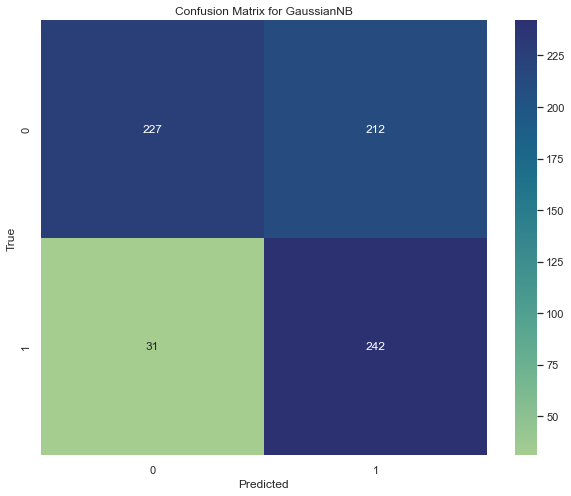

In [26]:
from sklearn.metrics import confusion_matrix

gnb = GaussianNB()
y_pred = cross_val_predict(gnb, X_train, y_train, cv=10)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, cmap='crest', fmt='d')
plt.title('Confusion Matrix for GaussianNB')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

We can see that the model correctly identified 227 deceased and 242 survivors, 31 were incorrectly predicted as dead, but as many as 212 deceased were classified as survivors. The same information was given to us by precision and recall – 242 out of 454 (242+212) survival predictions were correct (low precision), and the classifier identified 242 out of 273 (31+242) survivors (high recall).

We'll use one more measure to assess the performance of the model - ROC-AUC Score. ROC Curve is the relation of true positives to the false positives, i.e. the ratio of correctly classified survivors to cases incorrectly classified as survivors. To compare results, the area under the curve (AUC) is measured.

The ROC-AUC Score of LogisticRegression: 0.861
The ROC-AUC Score of LinearDiscriminant: 0.859
The ROC-AUC Score of KNeighbors: 0.855
The ROC-AUC Score of SVC: 0.836
The ROC-AUC Score of GaussianProcess: 0.860
The ROC-AUC Score of DecisionTree: 0.785
The ROC-AUC Score of GaussianNB: 0.840


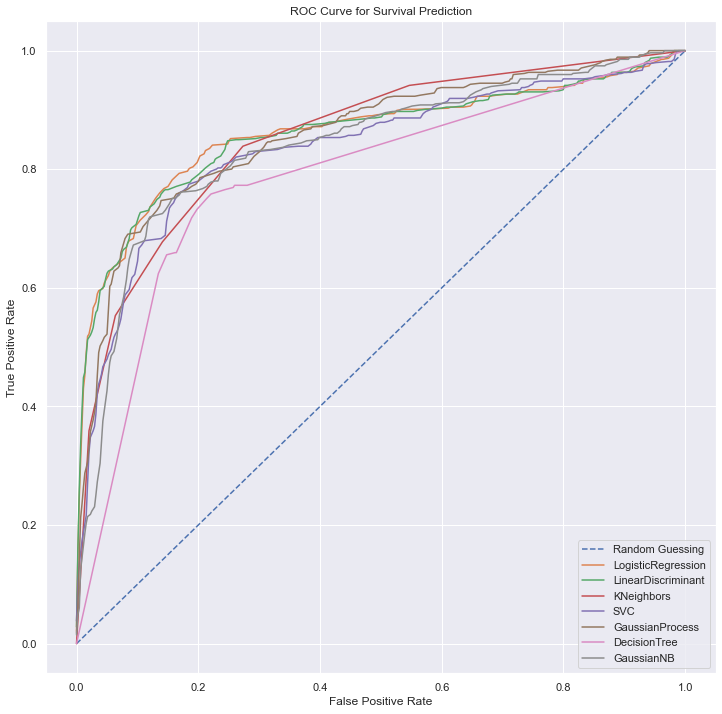

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(12, 12))
plt.plot([0, 1], [0, 1], '--', label='Random Guessing')

for clf_name, clf in classifiers:
    y_pred_probs = cross_val_predict(clf, X_train, y_train, cv=10, method='predict_proba')[:, 1]    
    fpr, tpr, thresholds = roc_curve(y_train, y_pred_probs)
    sns.lineplot(fpr, tpr, label=clf_name, ci=None)
    plt.legend(loc='lower right')
    print('The ROC-AUC Score of {}: {:.3f}'.format(clf_name, roc_auc_score(y_train, y_pred_probs)))


plt.title('ROC Curve for Survival Prediction')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Although the ROC-AUC Score is one of the safest measures (and certainly better than accuracy), here it tells us that the model we rejected has one of the higher scores. Why?

The ROC Curve does not operate on the classes estimated by the classifier, but on the probability that a given case belongs to one or another class. This means that different thresholds can be adopted above which we consider the selected person to be a survivor or deceased. Typically models use a 0.5 threshold (if the probability is below 0.5 the person is deceased, if it's higher or equal 0.5 the person survived), but the ROC curve is the model's performance in ranking probability for many different thresholds, not just one.

Let's carry out an experiment and measure the accuracy score for different thresholds in the GaussianNB model.

In [28]:
import numpy as np

for i in np.arange(0, 1.1, 0.1):
    y_pred = (cross_val_predict(gnb, X_train, y_train, cv=10, method='predict_proba')[:, 1]  >= i).astype(bool)
    print('Accuracy for {:.1f} threshold: {:.3f}'.format(i, accuracy_score(y_train, y_pred)))

Accuracy for 0.0 threshold: 0.383
Accuracy for 0.1 threshold: 0.528
Accuracy for 0.2 threshold: 0.580
Accuracy for 0.3 threshold: 0.625
Accuracy for 0.4 threshold: 0.647
Accuracy for 0.5 threshold: 0.659
Accuracy for 0.6 threshold: 0.683
Accuracy for 0.7 threshold: 0.709
Accuracy for 0.8 threshold: 0.732
Accuracy for 0.9 threshold: 0.761
Accuracy for 1.0 threshold: 0.617


High ROC-AUC and low accuracy/precision/recall/F1 mean our classifier is currently ineffective, but with the right threshold, it can do quite well. As you can see, GaussianNB with a threshold of 0.9 achieves an accuracy score of 0.761, which is quite a change from 0.659 for the standard threshold.

Now let us test the ensemble learning methods: voting, bagging, and boosting. To save ourselves some time we'll write a function to score classifiers. Since we'll be testing ensemble methods that use Decision Trees, let's write another function showing the contribution of each feature in the final prediction.

In [29]:
def score_classifier(clf, clf_name):
    '''Takes a classifier and its name, prints set of scores: Accuracy, Standard Deviation, F1, Precision, Recall, ROC-AUC.'''
    accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=10)
    y_pred = cross_val_predict(clf, X_train, y_train, cv=10)
    y_pred_probs = cross_val_predict(clf, X_train, y_train, cv=10, method='predict_proba')[:, 1]

    print('Accuracy Score of {}: {:.3f}'.format(clf_name, accuracy.mean()))
    print('Standard Deviation of {}: {:.3f}'.format(clf_name, accuracy.std()))
    print('F1 Score of {}: {:.3f}'.format(clf_name, f1_score(y_train, y_pred)))
    print('Precision of {}: {:.3f}'.format(clf_name, precision_score(y_train, y_pred)))
    print('Recall of {}: {:.3f}'.format(clf_name, recall_score(y_train, y_pred)))
    print('The ROC-AUC Score of {}: {:.3f}'.format(clf_name, roc_auc_score(y_train, y_pred_probs)))
    
def plot_importances(clf, clf_name):
    '''Takes a classifier and its name, prints bar plot of feature importances in descending order.'''
    clf.fit(X_train, y_train)
    feature_importances = pd.DataFrame({'feature':X_train.columns, 'importances':clf.feature_importances_})

    plt.figure(figsize=(12, 10))
    ax = sns.barplot(x='importances', y='feature', data=feature_importances.sort_values('importances', ascending=False))
    ax.set_title('Feature Importances in {}'.format(clf_name))
    ax.set_xlabel('')
    ax.set_ylabel('')
    plt.show()

Ok, let's start with Voting Classifier, a method that allows us to "combine" many models into one. Each of the selected classifiers will determine its forecast (because we choose the "soft" method, the forecast will be the probability, not a predicted class value), and then the model averages them to determine final predictions.

For the voting classifier, we'll select only effective models, therefore we'll reject Decision Tree and GaussianNB, which stand out.

In [30]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=classifiers[:4], voting='soft')     
score_classifier(vc, 'Voting Classifier')

Accuracy Score of Voting Classifier: 0.830
Standard Deviation of Voting Classifier: 0.038
F1 Score of Voting Classifier: 0.767
Precision of Voting Classifier: 0.809
Recall of Voting Classifier: 0.729
The ROC-AUC Score of Voting Classifier: 0.878


Now let's move to the Random Forest Classifier. This model uses the bagging method to simultaneously train multiple Decision Trees on random subsets of the training set, thus creating... a forest. We could build such a classifier ourselves using the BaggingClassifer and the DecisionTree model, but this time we'll let it go and move on.

Accuracy Score of Random Forest Classifier: 0.780
Standard Deviation of Random Forest Classifier: 0.059
F1 Score of Random Forest Classifier: 0.710
Precision of Random Forest Classifier: 0.716
Recall of Random Forest Classifier: 0.703
The ROC-AUC Score of Random Forest Classifier: 0.858


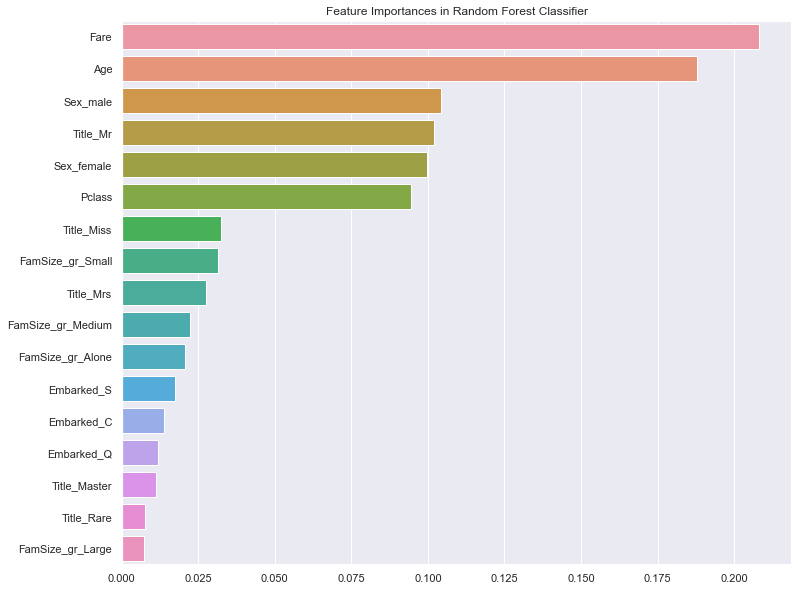

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

score_classifier(rf, 'Random Forest Classifier')
plot_importances(rf, 'Random Forest Classifier')

Next, let's use boosting method to train multiple Decision Trees again, this time not simultaneously, but sequentially. In the AdaBoost (adaptive boosting) method, each successive classifier pays more attention to cases where its predecessor made a mistake. With each iteration, it adjusts the weights of all previously trained models, controlling their impact on the final prediction. Thanks to this, at the end of the chain, we get a well-fitted model, much more accurate than the base classifier.

After that, we'll try out Gradient Boosting, which is also a sequential method of training classifiers. Gradient boosting doesn't adjust the weights, but fits subsequent models to the residual error made by the predecessor instead.

Accuracy Score of AdaBoost Classifier: 0.818
Standard Deviation of AdaBoost Classifier: 0.028
F1 Score of AdaBoost Classifier: 0.762
Precision of AdaBoost Classifier: 0.762
Recall of AdaBoost Classifier: 0.762
The ROC-AUC Score of AdaBoost Classifier: 0.867


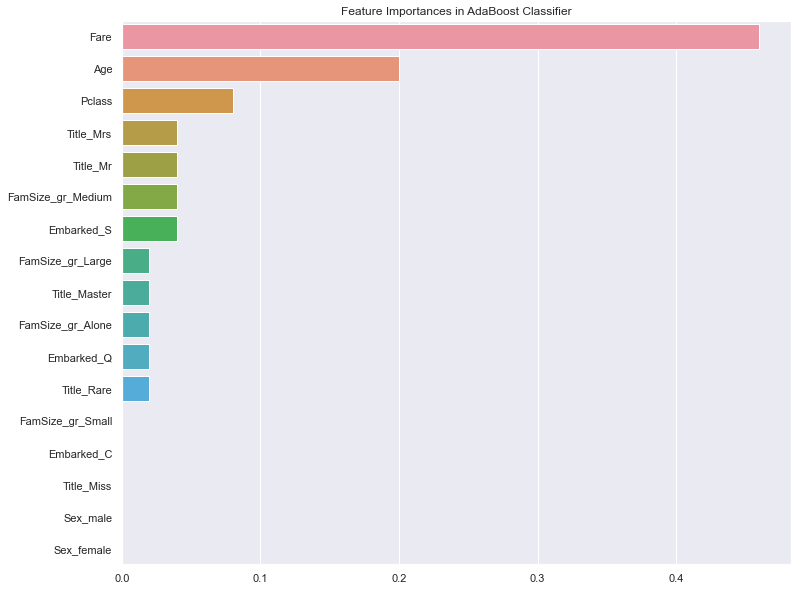

In [32]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

adb = AdaBoostClassifier(random_state=42)

score_classifier(adb, 'AdaBoost Classifier')
plot_importances(adb, 'AdaBoost Classifier')

Accuracy Score of Gradient Boosting Classifier: 0.825
Standard Deviation of Gradient Boosting Classifier: 0.031
F1 Score of Gradient Boosting Classifier: 0.754
Precision of Gradient Boosting Classifier: 0.814
Recall of Gradient Boosting Classifier: 0.703
The ROC-AUC Score of Gradient Boosting Classifier: 0.871


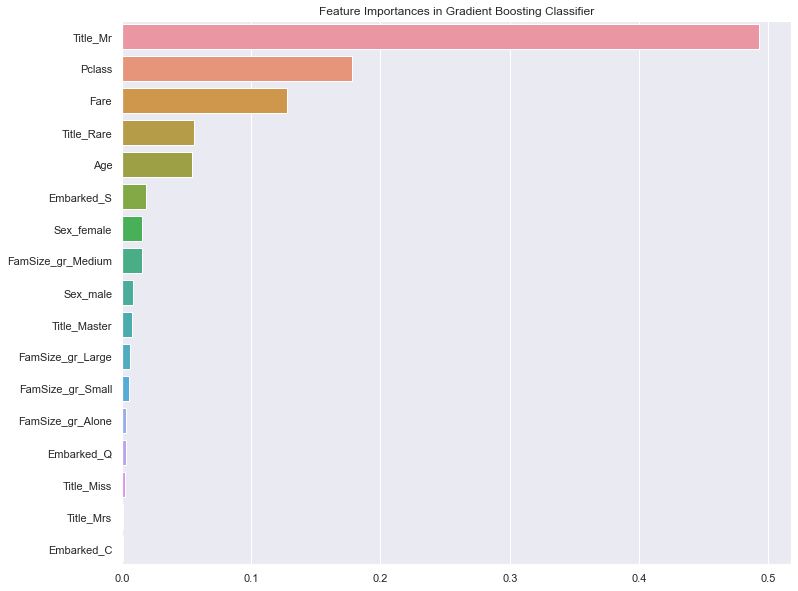

In [33]:
gb = GradientBoostingClassifier(random_state=42)

score_classifier(gb, 'Gradient Boosting Classifier')
plot_importances(gb, 'Gradient Boosting Classifier')

We've already tested enough options to determine the best performers and make a short list of the ones we'll now try to tune:
- Voting Classifier
- Ada Boost Classifier
- Gradient Boosting Classifier

Voting Classifier got the best results, but we won't tune it. Instead, let's see what can be squeezed out of the Random Forest Classifier, which, despite being one of the most advanced machine learning models, in this case, obtained quite average results.

The classifiers we trained thus far used default hyperparameters. To find the optimal combination of hyperparameters for each of them, we'll use the grid search cross-validation method, i.e. we'll create a list of hyperparameters (which we want to modify) and their values (which we want to try out). Then we'll try every possible combination of these values, and finally, determine which one was the best estimator.

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Best Parameters of Random Forest: {'bootstrap': False, 'max_depth': 4, 'min_samples_leaf': 0.001, 'n_estimators': 200}
Best Accuracy Score of Random Forest: 0.832

Accuracy Score of Random Forest Classifier (tuned): 0.832
Standard Deviation of Random Forest Classifier (tuned): 0.039
F1 Score of Random Forest Classifier (tuned): 0.772
Precision of Random Forest Classifier (tuned): 0.802
Recall of Random Forest Classifier (tuned): 0.744
The ROC-AUC Score of Random Forest Classifier (tuned): 0.856


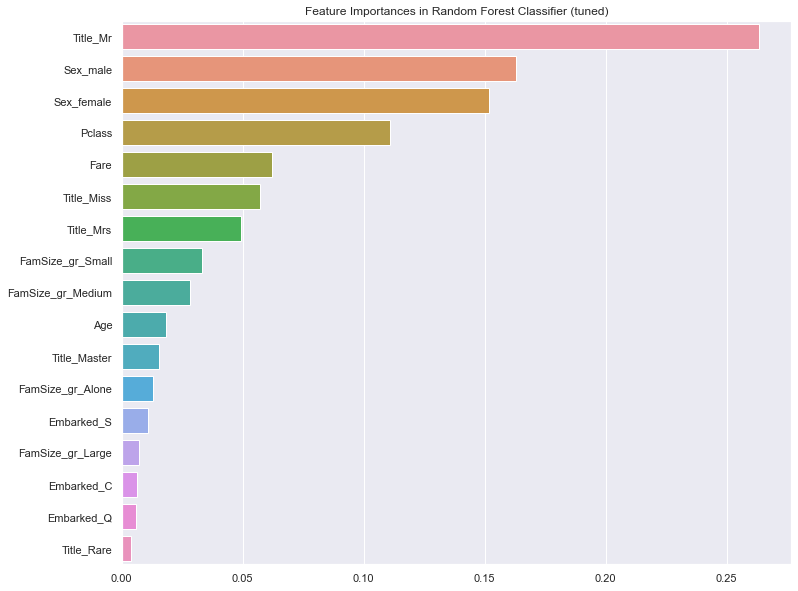

In [34]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

params = {
    'n_estimators': [200, 300, 400],
    'min_samples_leaf': [0.001, 0.01, 0.1],
    'max_depth':[1, 2, 3, 4, 5, None],
    'bootstrap': [True, False]
}

rf_grid = GridSearchCV(estimator=rf, 
                       param_grid=params, 
                       scoring='accuracy', 
                       cv=10, 
                       verbose=1,
                       n_jobs=-1)

rf_grid.fit(X_train, y_train)

print('Best Parameters of Random Forest: {}'.format(rf_grid.best_params_))
print('Best Accuracy Score of Random Forest: {:.3f}\n'.format(rf_grid.best_score_))
score_classifier(rf_grid.best_estimator_, 'Random Forest Classifier (tuned)')
plot_importances(rf_grid.best_estimator_, 'Random Forest Classifier (tuned)')

Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best Parameters of Ada Boost: {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 200}
Best Accuracy Score of Ada Boost: 0.829

Accuracy Score of Ada Boost Classifier (tuned): 0.829
Standard Deviation of Ada Boost Classifier (tuned): 0.028
F1 Score of Ada Boost Classifier (tuned): 0.776
Precision of Ada Boost Classifier (tuned): 0.779
Recall of Ada Boost Classifier (tuned): 0.773
The ROC-AUC Score of Ada Boost Classifier (tuned): 0.860


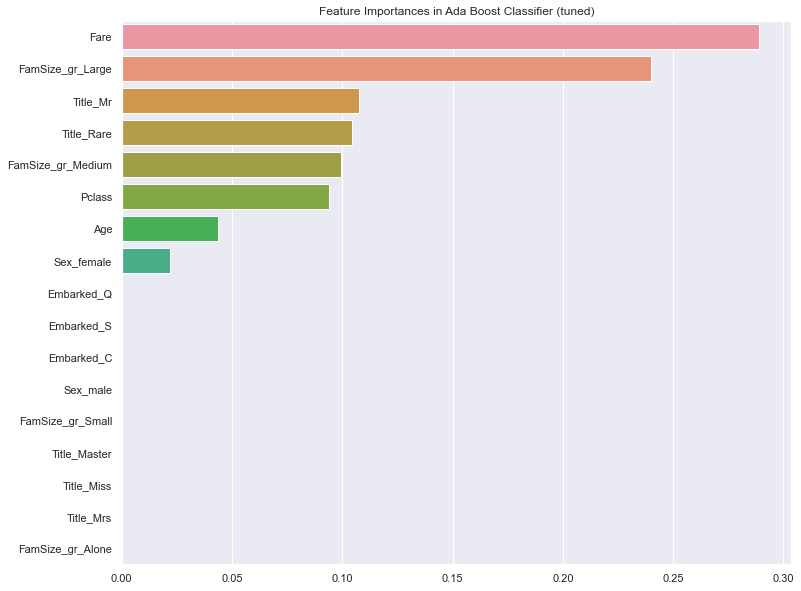

In [35]:
adb = AdaBoostClassifier(random_state=42)

params = {
    'n_estimators':[50, 100, 200, 300, 400, 500],
    'learning_rate':[0.7, 0.9, 1, 1.2, 1.4, 1.6],
    'algorithm':['SAMME', 'SAMME.R']
}

adb_grid = GridSearchCV(estimator=adb,
                       param_grid=params,
                       scoring='accuracy',
                       cv=10,
                       verbose=1,
                       n_jobs=-1)

adb_grid.fit(X_train, y_train)

print('Best Parameters of Ada Boost: {}'.format(adb_grid.best_params_))
print('Best Accuracy Score of Ada Boost: {:.3f}\n'.format(adb_grid.best_score_))
score_classifier(adb_grid.best_estimator_, 'Ada Boost Classifier (tuned)')
plot_importances(adb_grid.best_estimator_, 'Ada Boost Classifier (tuned)')

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Best Parameters of Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.6}
Best Accuracy Score of Gradient Boosting: 0.830

Accuracy Score of Gradient Boosting (tuned): 0.830
Standard Deviation of Gradient Boosting (tuned): 0.040
F1 Score of Gradient Boosting (tuned): 0.759
Precision of Gradient Boosting (tuned): 0.830
Recall of Gradient Boosting (tuned): 0.700
The ROC-AUC Score of Gradient Boosting (tuned): 0.868


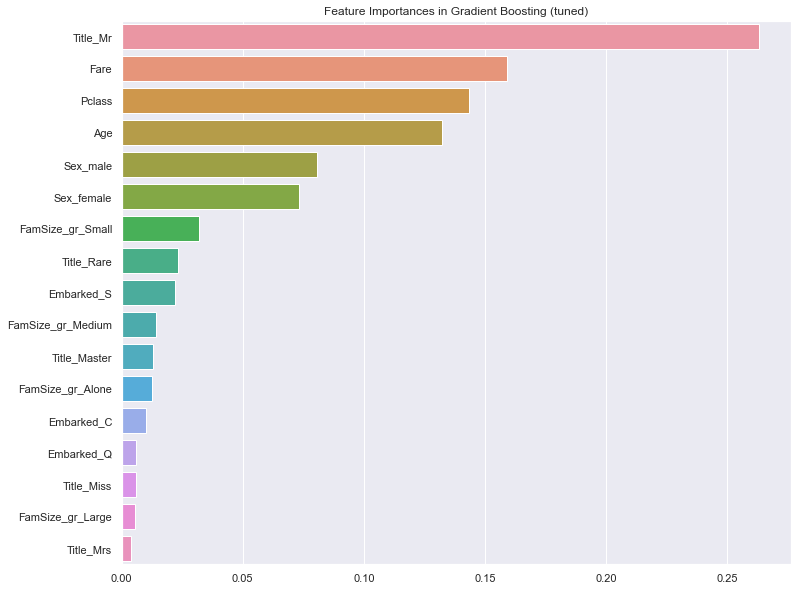

In [36]:
gb = GradientBoostingClassifier(random_state=42)

params = {
    'n_estimators':[100, 200, 300],
    'learning_rate':[0.001, 0.01, 0.1],
    'subsample':[0.6, 0.8, 1.0],
    'max_depth':[1, 3, 5, None]
}

gb_grid = GridSearchCV(estimator=gb,
                       param_grid=params,
                       scoring='accuracy',
                       cv=10,
                       verbose=1,
                       n_jobs=-1)

gb_grid.fit(X_train, y_train)

print('Best Parameters of Gradient Boosting: {}'.format(gb_grid.best_params_))
print('Best Accuracy Score of Gradient Boosting: {:.3f}\n'.format(gb_grid.best_score_))
score_classifier(gb_grid.best_estimator_, 'Gradient Boosting (tuned)')
plot_importances(gb_grid.best_estimator_, 'Gradient Boosting (tuned)')

Even after tuning, none of the models perform as well as the Voting Classifier. We have no choice but to conduct the final test. At the very beginning, we divided the data into training and test sets, now let us see how effective the Voting Classifier is against brand-new data.

In [37]:
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

print('Test Set Accuracy Score of Voting Classifier: {:.3f}'.format(accuracy_score(y_test, y_pred)))

Test Set Accuracy Score of Voting Classifier: 0.827


Close enough, our model seems to handle the new data very well and suffers neither from underfitting nor from overfitting. It's time to train the classifier on the full dataset, make predictions using competition data, and export them to a .csv file.

In [38]:
vc.fit(X, y)
output = vc.predict(X_pred)

submission = pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived':output})
submission.to_csv('submission.csv', index=False)

After submitting our predictions to the Kaggle competition we get a score of 0.78229 – not too bad. There's plenty of room for improvement, but I'd say that's a pretty good score for a first-timer.